# 📊 Customer Churn Analysis - Telecom Dataset

## 🧠 Business Context

In the competitive telecom industry, customer retention is critical to maintaining profitability. The cost of acquiring new customers is much higher than retaining existing ones. This analysis explores customer data from a telecom company to understand the key factors that lead to customer churn.

The dataset includes customer demographics, account information, service usage, and billing preferences. By analyzing these factors, we can identify patterns that distinguish churned customers from loyal ones.

## 🎯 Objective

- Analyze customer behavior and demographic patterns that influence churn.
- Identify high-risk customer segments using statistical and visual analysis.
- Generate actionable insights to help the business reduce churn and improve customer retention.


In [64]:
# 📥 Data Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv("Downloads/CustomerChurn.csv")

# Preview the data
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## 📥 Data Import & Initial Glance

- The dataset is loaded using pandas.
- We will now explore the structure, types, and missing values in the dataset.


## Data Cleaning & Preparation

In [15]:
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0")
df["Totalcharges"] = df["TotalCharges"].astype("float")

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [17]:
df.isnull().sum().sum()

np.int64(0)

In [18]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,Totalcharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [20]:
df["customerID"].duplicated().sum()

np.int64(0)

In [21]:
def conv(value):
    if value==1:
        return "yes"
    else:
        return "no"

df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

- Converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

In [22]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Totalcharges
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,29.85
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,1889.50
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,108.15
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1840.75
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,151.65


## 📊 Exploratory Data Analysis (EDA)

We'll explore how different customer attributes affect churn, starting with univariate and bivariate analysis.


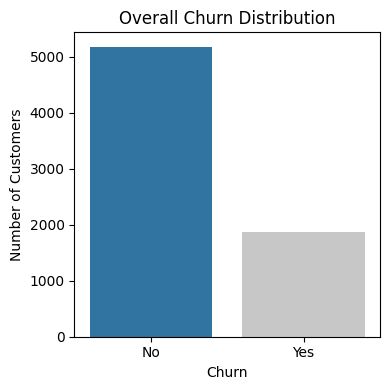

In [142]:
plt.figure(figsize=(4,4))
churn_palette = {"Yes":'#c7c7c7' , "No":'#1f77b4'}
sns.countplot(x='Churn', data=df, palette=churn_palette)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Overall Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()


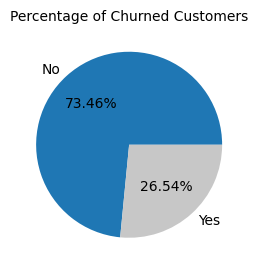

In [144]:
plt.figure(figsize = (3,4))
gb = df.groupby('Churn').agg({'Churn':'count'})
colors = ['#1f77b4','#c7c7c7']
plt.pie(gb['Churn'], labels = gb.index, autopct ="%1.2f%%", colors = colors )
plt.title("Percentage of Churned Customers", fontsize =10)
plt.show()

- From the given pie chart we can conclude that 26.54% of our customers have churned out
- Now let's explore the reason behind it

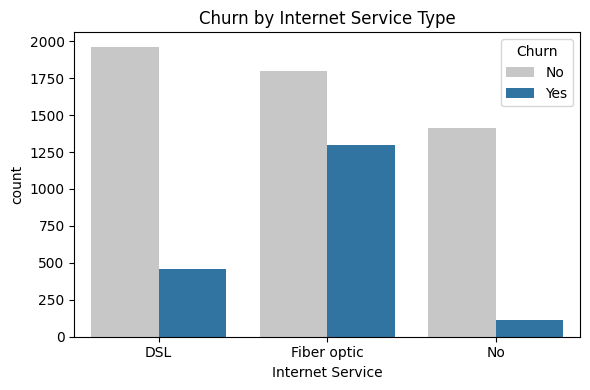

In [114]:
plt.figure(figsize=(6,4))
internet_palette = ['#c7c7c7', '#1f77b4']  # No Internet, DSL, Fiber Optic
sns.countplot(x='InternetService', data=df, hue='Churn', palette=internet_palette)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churn by Internet Service Type")
plt.xlabel("Internet Service")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

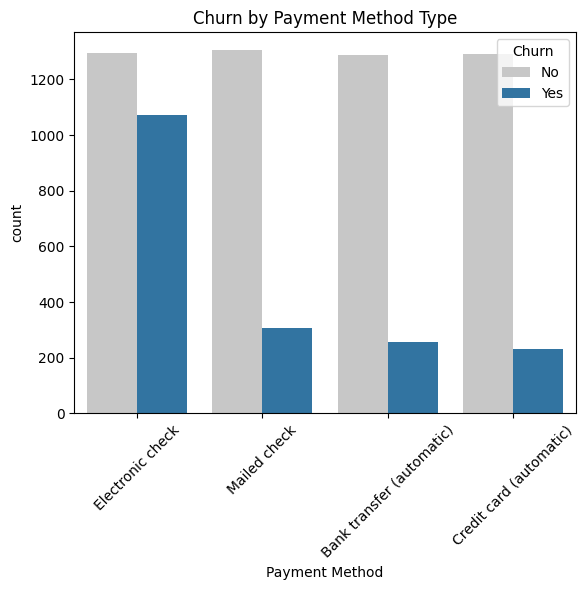

In [115]:
plt.figure(figsize=(6,6))
payment_palette = ['#c7c7c7', '#1f77b4']  
# Bank Transfer, Electronic Check, Credit Card, Mailed Check
sns.countplot(x='PaymentMethod', data=df, hue='Churn', palette=payment_palette)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churn by Payment Method Type")
plt.xlabel("Payment Method")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

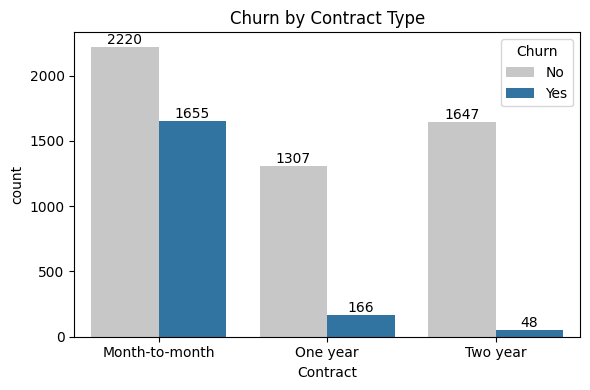

In [117]:
plt.figure(figsize=(6,4))
payment_palette = ['#c7c7c7', '#1f77b4'] 
ax = sns.countplot(x='Contract', data=df, hue='Churn', palette=payment_palette)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churn by Contract Type")
plt.xlabel("Contract")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


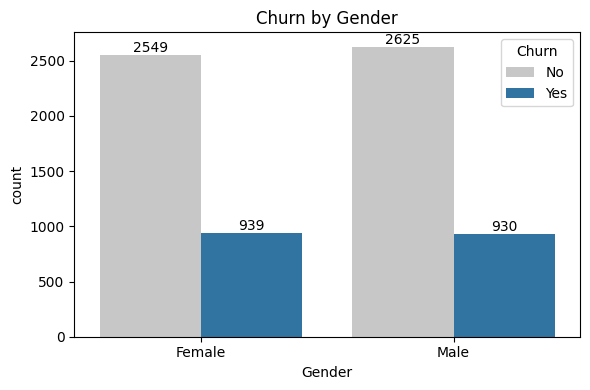

In [118]:
plt.figure(figsize=(6,4))
payment_palette = ['#c7c7c7', '#1f77b4'] 
ax = sns.countplot(x='gender', data=df, hue='Churn', palette=payment_palette)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churn by Gender")
plt.xlabel("Gender")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

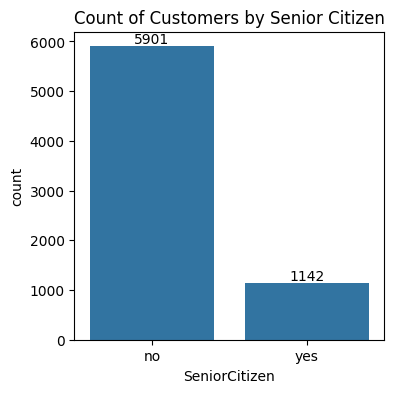

In [49]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "SeniorCitizen", data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Senior Citizen")
plt.show()

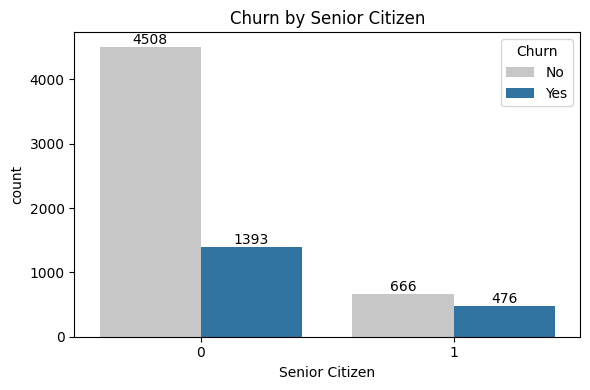

In [119]:
plt.figure(figsize=(6,4))
payment_palette = ['#c7c7c7', '#1f77b4'] 
ax = sns.countplot(x='SeniorCitizen', data=df, hue='Churn', palette=payment_palette)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churn by Senior Citizen")
plt.xlabel("Senior Citizen")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


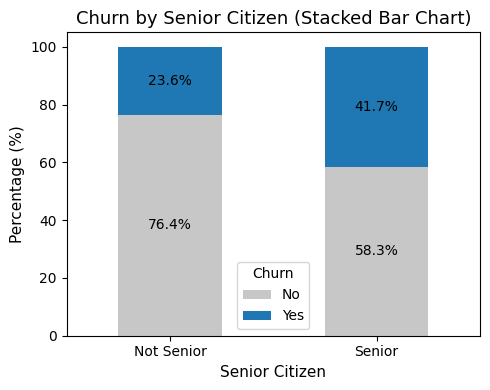

In [133]:
# Calculate percentage churn by senior status
total_counts = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100

# Plot setup
fig, ax = plt.subplots(figsize=(5, 4))  # Balanced size

# Plot stacked bar chart
total_counts.plot(kind='bar', stacked=True, ax=ax, color=['#c7c7c7', '#1f77b4'])

# Add percentage labels
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + height / 2
        ax.text(x, y, f'{height:.1f}%', ha='center', va='center', fontsize=10)

# Axis and legend formatting
ax.set_title('Churn by Senior Citizen (Stacked Bar Chart)', fontsize=13)
ax.set_xlabel('Senior Citizen', fontsize=11)
ax.set_ylabel('Percentage (%)', fontsize=11)
ax.set_xticks([0, 1])  # Fix position
ax.set_xticklabels(['Not Senior', 'Senior'], rotation=0)  # Fix label and rotation
ax.legend(title='Churn', loc='best')

plt.tight_layout()
plt.show()


- Comparatively a greater percentage of people in senior citizen category have churned.

In [59]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'Totalcharges'], dtype=object)

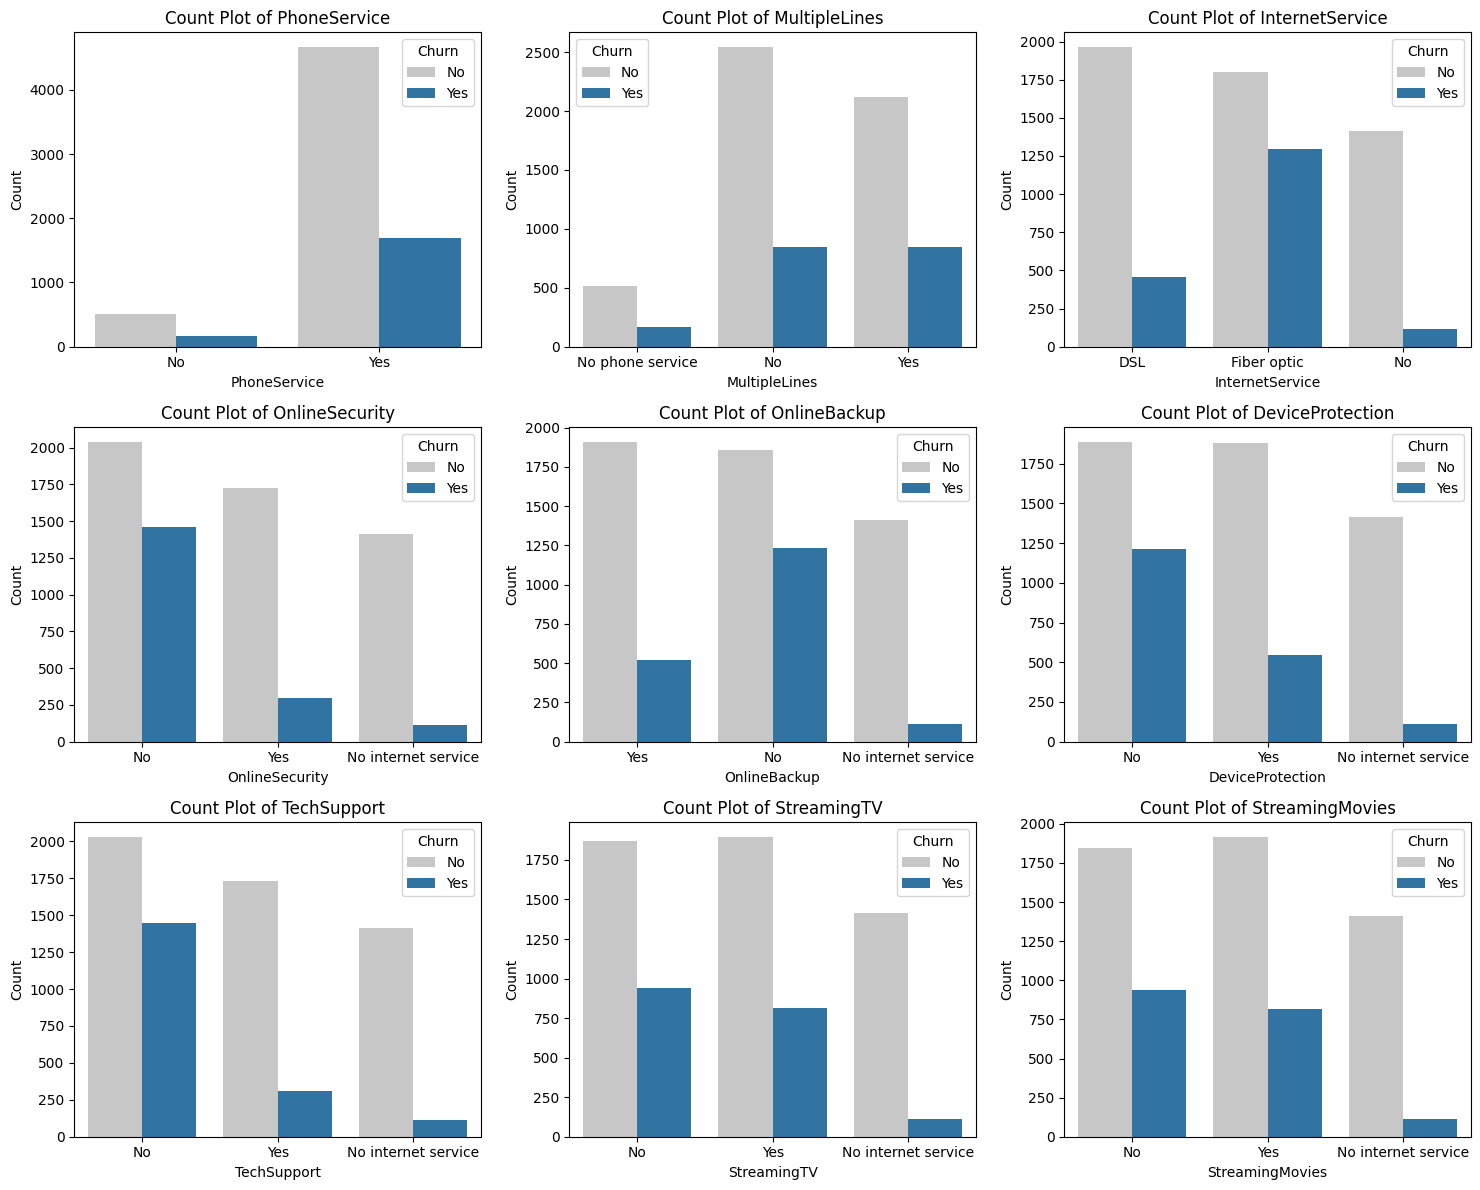

In [122]:
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of columns for the subplot grid (you can change this)
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Adjust figsize as needed

# Flatten the axes array for easy iteration (handles both 1D and 2D arrays)
axes = axes.flatten()
payment_palette = ['#c7c7c7', '#1f77b4'] 

# Iterate over columns and plot count plots
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue = df["Churn"],palette = payment_palette )
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


- The majority of customers who do not churn tend to have services like PhoneService, InternetService (particularly DSL), and OnlineSecurity enabled. For services like OnlineBackup, TechSupport, and StreamingTV, churn rates are noticeably higher when these services are not used or are unavailable.

## 📈 Advanced EDA

Going deeper into churn trends using feature engineering, segmentation, and statistics.


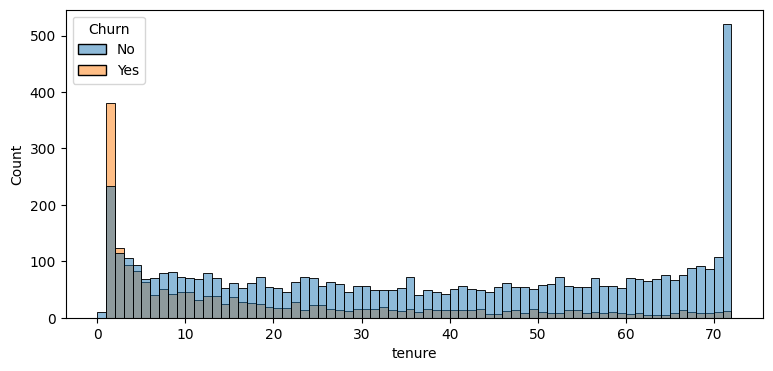

In [57]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn")
plt.show()


- People who have used our services for a long time have stayed and people who have used our services for 1 or 2 months have churned

In [82]:
contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100
print(contract_churn.round(2))


Churn              No    Yes
Contract                    
Month-to-month  57.29  42.71
One year        88.73  11.27
Two year        97.17   2.83


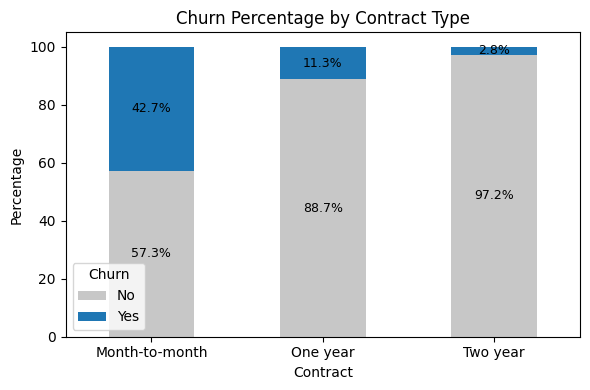

In [130]:
ax = contract_churn.plot(kind='bar', stacked=True, figsize=(6, 4), color=['#c7c7c7', '#1f77b4'])
plt.title("Churn Percentage by Contract Type")
plt.ylabel("Percentage")
plt.xticks(rotation=0)

# Add percentage labels to each segment
for container in ax.containers:
    labels = [f'{v.get_height():.1f}%' if v.get_height() > 0 else '' for v in container]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()


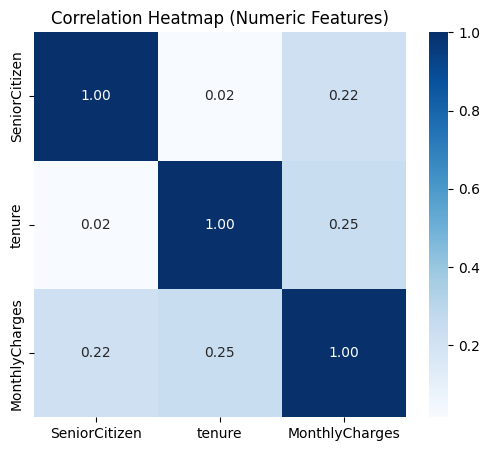

In [140]:
# Select numerical columns only
num_cols = df.select_dtypes(include=['int64', 'float64'])
corr = num_cols.corr()

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


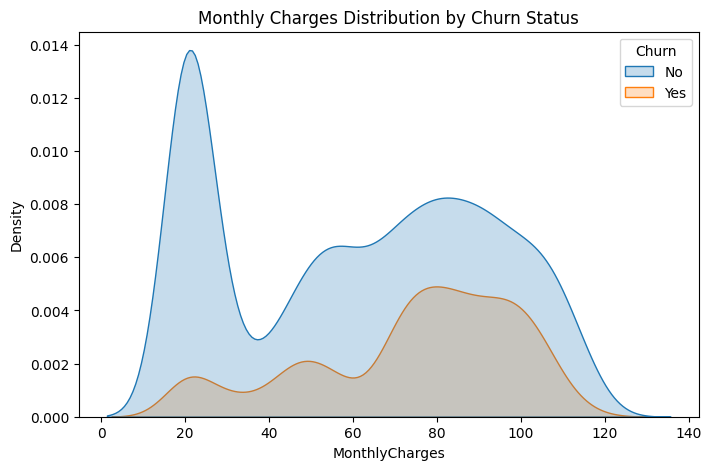

In [89]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x="MonthlyCharges", hue="Churn", shade=True)
plt.title("Monthly Charges Distribution by Churn Status")
plt.show()

## 🧾 Key Insights & Recommendations

- Month-to-month contracts have significantly higher churn rates.
- Customers with electronic check payment method churn the most.
- Long-tenured customers on annual contracts are the least likely to churn.

### 📌 Recommendations:
- Offer discounts to month-to-month customers for converting to long-term contracts.
- Target electronic check users with alternate payment method offers.
